#### import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read data

In [3]:
data = pd.read_csv('digikala-orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


#### Number of orders per month

In [4]:
data['DateTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'])

data['YearMonth'] = data['DateTime_CartFinalize'].map(lambda date: 100*date.year + date.month)
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,YearMonth
0,2714054,469662,21386,2015-10-15 08:50:56,597982.0,محمود آباد,1.0,201510
1,11104039,3063877,248497,2018-02-11 00:29:26,980000.0,خرمدره,1.0,201802
2,4228130,3184893,50144,2016-06-14 00:30:08,229358.0,قرچک,1.0,201606
3,22225624,6888562,70208,2018-09-03 14:37:19,16514.0,قم,1.0,201809
4,4068771,2533490,67627,2016-05-21 11:51:02,133028.0,تهران,1.0,201605


In [5]:
YearMonth_order = data.groupby(['YearMonth'])['ID_Order'].count().reset_index()
YearMonth_order

,YearMonth,ID_Order
0,201309,6
1,201310,73
2,201311,90
3,201312,116
4,201401,141
...,...,...
59,201808,6040
60,201809,6567
61,201810,5547
62,201811,6002


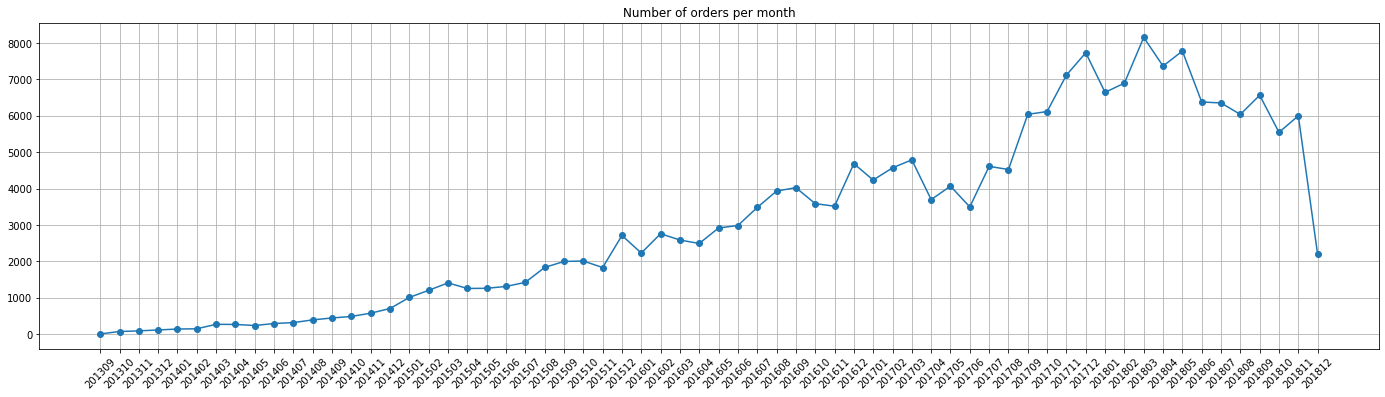

In [6]:
plt.figure(figsize=(24, 6))
plt.plot(YearMonth_order['YearMonth'].to_numpy(dtype=str), YearMonth_order['ID_Order'], marker='o')
plt.grid()
plt.xticks(rotation=45)
plt.title('Number of orders per month')
plt.savefig('orderspermonth.png')
plt.show()

#### Separate customers by city

In [7]:
customer_city = data.groupby(['city_name_fa'])['ID_Customer'].nunique().reset_index()
customer_city

,city_name_fa,ID_Customer
0,آب بر,14
1,آبادان,320
2,آباده,48
3,آباده طشک,3
4,آبدان,2
...,...,...
901,گیوی,10
902,یاسوج,229
903,یاسوکند,1
904,یامچی,1


In [8]:
#plt.pie(customer_city['ID_Customer'], labels =customer_city['city_name_fa'])
#plt.show()

#### this pie chart is not ideal. The data is not readable.

In [9]:
sorted_customerCity = customer_city.sort_values('ID_Customer', ascending=False)
sorted_customerCity

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
...,...,...
552,فرخی,1
71,اسیر,1
782,پیشین,1
783,چابهار,1


In [10]:
bigOrders_City = sorted_customerCity[:9]
bigOrders_City

,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
593,قم,1905


In [11]:
lowOrders_City = sorted_customerCity[9:]
lowOrders_City

,city_name_fa,ID_Customer
818,کرمانشاه,1718
905,یزد,1626
817,کرمان,1254
399,ساری,1236
583,قزوین,1028
...,...,...
552,فرخی,1
71,اسیر,1
782,پیشین,1
783,چابهار,1


In [12]:
sum_lowercity=lowOrders_City['ID_Customer'].sum()
sum_lowercity

45742

In [13]:
optimized_data = bigOrders_City
optimized_data.loc[len(bigOrders_City)]=['Others', sum_lowercity]
optimized_data

C:\Users\Beni\AppData\Local\Temp\ipykernel_6720\803854903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optimized_data.loc[len(bigOrders_City)]=['Others', sum_lowercity]


,city_name_fa,ID_Customer
215,تهران,81048
815,کرج,4758
654,مشهد,4674
76,اصفهان,4664
97,اهواز,3353
505,شیراز,3076
355,رشت,2414
202,تبریز,2075
593,قم,1905
9,Others,45742


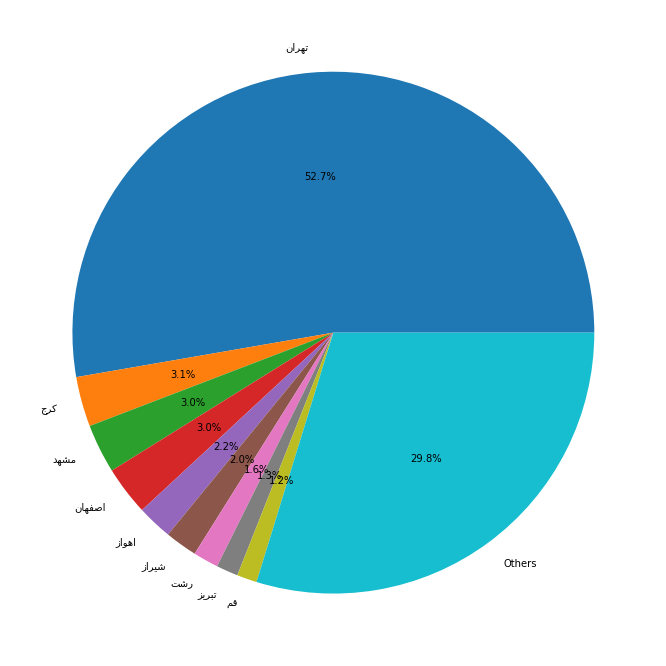

In [20]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape

plt.figure(figsize=(12,12))
persian_labels = [get_display(reshape(label)) for label in bigOrders_City['city_name_fa'].to_numpy(dtype='str')]
plt.pie(optimized_data['ID_Customer'], labels =persian_labels, autopct='%1.1f%%')
plt.show()

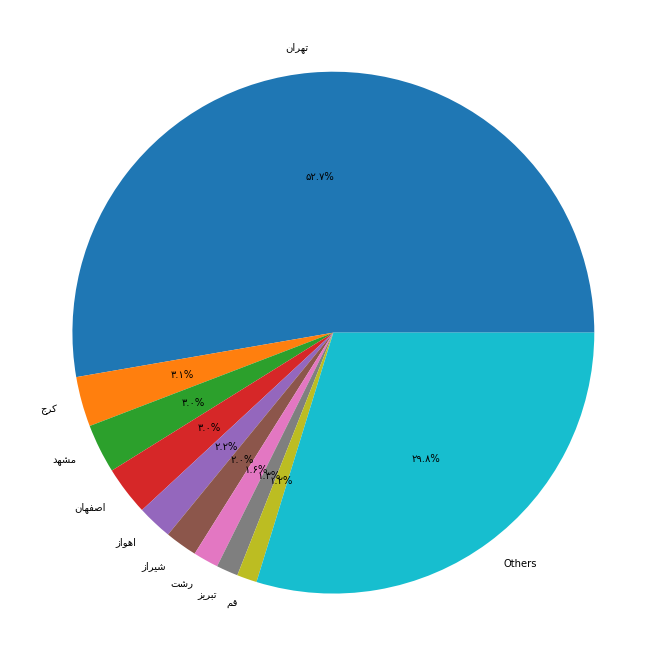

In [25]:
def en_to_fa(num, formatter='%1.1f%%'):
 num_as_string = formatter % num 
 mapping = dict(list(zip('0123456789.%', '۰۱۲۳۴۵۶۷۸۹.%')))
 return ''.join(mapping[digit] for digit in num_as_string)

plt.figure(figsize=(12,12))
persian_labels = [get_display(reshape(label)) for label in bigOrders_City['city_name_fa'].to_numpy(dtype='str')]
plt.pie(optimized_data['ID_Customer'], labels=persian_labels, autopct=en_to_fa)
plt.savefig('Separate-customers-by-city.png', dpi=200)
plt.show()